In [1]:
import tensorflow as tf
import keras
import keras.backend as K

Using TensorFlow backend.


In [2]:
print (tf.__version__, keras.__version__)

1.12.0 2.2.4


In [3]:
import os
import sys

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report

import numpy as np
import random
from random import randint
import pandas as pd
import seaborn as sns
import json

import cv2 as cv
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator, img_to_array
from keras.preprocessing.image import img_to_array
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from PIL import Image
from glob import glob
from tqdm import tqdm, tqdm_notebook

%pylab inline
%matplotlib inline

sys.path.append('script/')
from metrics import *
from ressources import *
from model import *
from weights_path import *
sys.path.append('/root/Keras-ResNeXt/')

Populating the interactive namespace from numpy and matplotlib


/root/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['add', 'average', 'random', 'maximum', 'concatenate', 'multiply', 'randint', 'copy', 'minimum', 'subtract', 'dot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


9446


/root/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


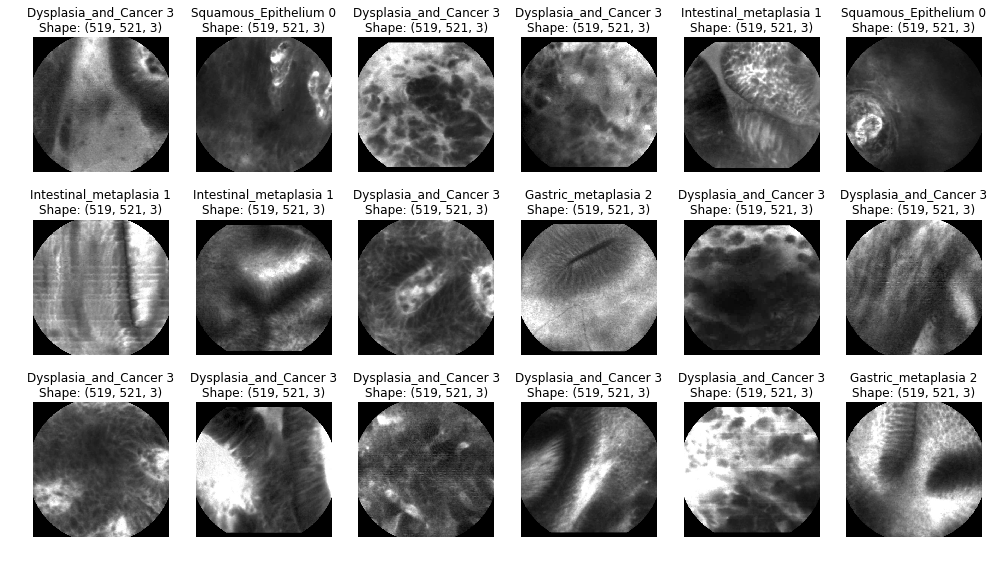

In [4]:
name = 'resnet_2'
height, width, channel = 224, 224, 3
batch_size = 32
trainDir = 'TrainingSetImagesDir/'
testDir = 'TestSetImagesDir/'

df_train = pd.read_csv('TrainingSet_20aimVO.csv')
df_test = pd.read_csv('Mauna_Kea_Supp_Material/test_data_order.csv')

classes = ['Squamous_Epithelium', 'Intestinal_metaplasia', 'Gastric_metaplasia', 'Dysplasia_and_Cancer']

labeled_files = glob('TrainingSetImagesDir/*.png')

labeled_files = [lbl for lbl in labeled_files if  lbl.split(os.path.sep)[-1] in list(df_train.image_filename.values)]
print (len(labeled_files))

id_label_map = {k:v for k, v in zip(df_train.image_filename.values, df_train.class_number.values)}

cols = 6
rows = 4

randomLst = []
for i in range(0, (rows * cols)):
    randomLst.append(randint(0, len(labeled_files)))

plot_imgs(randomLst, classes, labeled_files, id_label_map, cols=6, rows=3)

In [5]:
from keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input
from keras.optimizers import Adam, RMSprop
from keras.losses import binary_crossentropy, categorical_crossentropy
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications.xception import Xception
from keras.applications.densenet import DenseNet201

In [6]:
version = 'pseudolbl'

In [74]:
K.clear_session()
name = 'inception_resnet'
weights = inception_resnet_v2_path
pretrained_model = InceptionResNetV2(weights=weights, include_top=False)
model = get_model_1(pretrained_model, 4, 0)
# model = get_model_classif_nasnet(pretrained_model, 4, 0)
model.load_weights('./model2/inception_resnet_v2_2_weights.14-0.03-0.99-0.03-0.99.hdf5')

In [157]:
K.clear_session()
name = 'xception_{}'.format(version)
weights = xception_path
pretrained_model = Xception(weights=weights, include_top=False)

model = get_model_1(pretrained_model, 4, 0)
# model = get_model_classif_nasnet(pretrained_model, 4, 0)

model.load_weights('model2/resnext_weights.13-0.02-0.99-0.02-1.00.hdf5')

In [139]:
K.clear_session()
name = 'densenet_2_{}'.format(version)
weights = densenet201_path
pretrained_model = DenseNet201(weights=weights, include_top=False)
model = get_model_1(pretrained_model, 4, 0)
# model = get_model_classif_nasnet(pretrained_model, 4, 0)
model.load_weights("model2/densenet_2_weights.13-0.03-0.99-0.03-0.99.hdf5")

In [158]:
testImgs = glob('TestSetImagesDir/*/*.png')
df_sub = pd.DataFrame({'image_filename':df_test.image_filename.values, "class_number":['0'] * len(df_test.image_filename.values)})

In [159]:
datagen = datagen_create()

In [160]:
sub_generator = datagen.flow_from_dataframe(directory='test/',
                                            dataframe=df_sub,
                                            x_col="image_filename",
                                            y_col="class_number",
                                            class_mode='categorical',
                                            target_size=(height, width),
                                            batch_size=1,
                                            shuffle=False,
                                             pickle_safe = True,
                                             workers = 1,
                                            seed=42)

Found 1715 validated image filenames belonging to 1 classes.


In [232]:
# num_test_images = len(testImgs)
# sub_predictions = model.predict_generator(sub_generator, steps=num_test_images, verbose=1)

In [ ]:
test_filenames = [x.split(os.path.sep)[-1] for x in sub_generator.filenames]
df = pd.DataFrame({'image_filename': test_filenames})
df['class_number'] = list(np.argmax(sub_predictions, axis=1))

In [146]:
y_pred_val_classes = np.argmax(sub_predictions, axis=1) 
y_pred_val_max_probas = np.max(sub_predictions, axis=1)

In [148]:
indices = np.where(y_pred_val_max_probas>0.99)

In [231]:
# print (np.unique(inceptionResNetProbas, return_counts=True))

In [138]:
# xceptionClasses = y_pred_val_classes

In [156]:
# densenetClasses = y_pred_val_classes

In [122]:
# inceptionClasses = y_pred_val_classes

In [22]:
# xceptionMaxProbas = y_pred_val_max_probas > 0.99

In [70]:
# densenetMaxProbas = y_pred_val_max_probas > 0.99

In [83]:
# inceptionResNetProbas = y_pred_val_max_probas > 0.99

In [162]:
dense_indices = np.where(densenetMaxProbas > 0.99)
xception_indices = np.where(xceptionMaxProbas > 0.99)
inception_indices = np.where(inceptionResNetProbas > 0.99)
# denseFiles = densenetClasses

In [265]:
denseMaxClass = list(densenetClasses[dense_indices])
inceptionMaxClass = list(inceptionClasses[inception_indices])
xceptionMaxClass = list(xceptionClasses[xception_indices])

In [269]:
# np.intersect1d(denseMaxClass, inceptionMaxClass, xceptionMaxClass)

In [254]:
denseFiles = np.array(sub_generator.filenames)[dense_indices]
inceptionFiles = np.array(sub_generator.filenames)[inception_indices]
xceptionFiles = np.array(sub_generator.filenames)[xception_indices]

In [272]:
id_label_map_dense = {k:v for k, v in zip(list(denseFiles), denseMaxClass)}
id_label_map_xception = {k:v for k, v in zip(xceptionFiles, xceptionClasses)}
id_label_map_inception = {k:v for k, v in zip(inceptionFiles, inceptionClasses)}

In [286]:
psd_lbl_files = list(set(list(denseFiles)).intersection(list(inceptionFiles)))

In [287]:
# psd_lbl_files = list(set(psd_lbl_files).intersection(inceptionFiles))

In [288]:
psd_lbl_files = list(map(str, psd_lbl_files))

In [289]:
len(psd_lbl_files)

1058

In [290]:
id_label_psd = {x: id_label_map_dense[x] for x in psd_lbl_files
                 if (id_label_map_dense[x] == id_label_map_inception[x])}

In [296]:
len(id_label_psd)

373

In [318]:
# list(id_label_psd.keys())

In [319]:
df_psd_lbl = pd.DataFrame({'image_filename':list(id_label_psd.keys()), 'class_number':list(id_label_psd.values())})

In [320]:
df_psd_lbl.to_csv('pseudo_label.csv')

In [321]:
id_label_map_xception['im_6_33.png']

3

In [322]:
df_psd_lbl

,image_filename,class_number
0,im_33_37.png,1
1,im_108_26.png,3
2,im_10_16.png,0
3,im_66_57.png,0
4,im_87_20.png,3
5,im_53_20.png,3
6,im_7_57.png,0
7,im_23_57.png,0
8,im_92_26.png,3
9,im_12_20.png,3


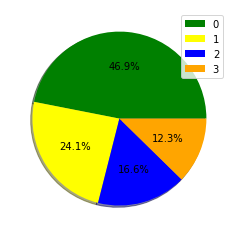

In [323]:
values = df_psd_lbl.class_number.value_counts()
values /= np.sum(values)
values *= 100
labels = ['0', '1', '2', '3']
colors = ['green', 'yellow', 'blue', 'orange']
plt.pie(values, colors=colors,autopct='%1.1f%%', shadow=True)
plt.legend(labels,loc='best')
plt.show()

In [302]:
# psd_lbl_class

In [223]:
type(psd_lbl_files[0])

str

In [189]:
# list(denseMaxClass)

In [196]:
# list(set(list(denseMaxClass)).intersection(list(xceptionMaxClass)).intersection(list(inceptionMaxClass)))

In [198]:
# np.intersect1d(denseMaxClass, inceptionMaxClass, xceptionMaxClass)

In [233]:
# list(set(list(denseFiles)).intersection(list(xceptionFiles)).intersection(list(inceptionMaxClass)))

In [193]:
# psd_lbl_files = list(set(list(denseMaxClass)).intersection(list(xceptionMaxClass)).intersection(list(inceptionMaxClass)))

In [86]:
# combined = np.vstack((sub1.class_number.values, sub1.class_number.values, sub2.class_number.values, sub3.class_number.values, sub4.class_number.values, sub5.class_number.values, sub6.class_number.values, sub7.class_number.values, sub8.class_number.values)).T
# combined = np.vstack((xceptionMaxProbas, densenetMaxProbas, inceptionResNetProbas)).T

In [87]:
# result = [np.bincount(x).argmax() for x in combined]

In [234]:
# print (np.unique(result, return_counts=True))

In [101]:
# result

In [168]:
# print (np.where(result==1))
# print ([ind for ind, x in enumerate(result) if (x == 1)])